In [1]:
import numpy as np
import torch

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
def model(t_u, w, b):
    return w * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    return ((t_p - t_c) ** 2).mean()

In [5]:
W = torch.ones(())
b = torch.zeros(())

In [6]:
t_p = model(t_u, W, b)

In [7]:
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [8]:
loss = loss_fn(t_p, t_c)

In [9]:
loss

tensor(1763.8848)

In [10]:
delta = 0.1

In [11]:
loss_rate_of_change_W = \
    (loss_fn(model(t_u, W + delta, b), t_c)) - \
    (loss_fn(model(t_u, W - delta, b), t_c)) / (2.0 * delta)

In [12]:
learning_rate = 1e-2

In [13]:
W = W - learning_rate * loss_rate_of_change_W

In [14]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, W, b + delta), t_c)) - \
    (loss_fn(model(t_u, W, b - delta), t_c)) / (2.0 * delta)

In [15]:
b = b - learning_rate * loss_rate_of_change_b

In [16]:
def dloss_fn(t_p, t_c):
    return 2 * (t_p - t_c) / t_p.size(0)

In [17]:
def dmodel_dw(t_u, w, b):
    return t_u

In [18]:
def dmodel_db(t_u, w, b):
    return 1.0

In [19]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)

    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [29]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate * grad

        print("Epoch %d, Loss %f" % (epoch, float(loss)))

        print("Params:", abs(params[0] / params[1]))
        print("Grad:", grad)

    return params

In [31]:
t_un = t_u * 0.1

In [39]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c
)

Epoch 1, Loss 80.364342
Params: tensor(16.6931)
Grad: tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
Params: tensor(16.0042)
Grad: tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
Params: tensor(18.1579)
Grad: tensor([-12.4631,   0.8587])
Epoch 4, Loss 29.756193
Params: tensor(22.5372)
Grad: tensor([-5.2218,  2.1327])
Epoch 5, Loss 29.507153
Params: tensor(30.8660)
Grad: tensor([-2.3715,  2.6310])
Epoch 6, Loss 29.392456
Params: tensor(50.1712)
Grad: tensor([-1.2492,  2.8241])
Epoch 7, Loss 29.298828
Params: tensor(137.0145)
Grad: tensor([-0.8071,  2.8970])
Epoch 8, Loss 29.208717
Params: tensor(186.5102)
Grad: tensor([-0.6325,  2.9227])
Epoch 9, Loss 29.119415
Params: tensor(55.5908)
Grad: tensor([-0.5633,  2.9298])
Epoch 10, Loss 29.030489
Params: tensor(32.7258)
Grad: tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
Params: tensor(23.2254)
Grad: tensor([-0.5240,  2.9264])
Epoch 12, Loss 28.853565
Params: tensor(18.0237)
Grad: tensor([-0.5190,  2.9222])
Epoch 13, Loss 28

In [40]:
t_p = model(t_un, *params)

In [41]:
from matplotlib import pyplot as plt

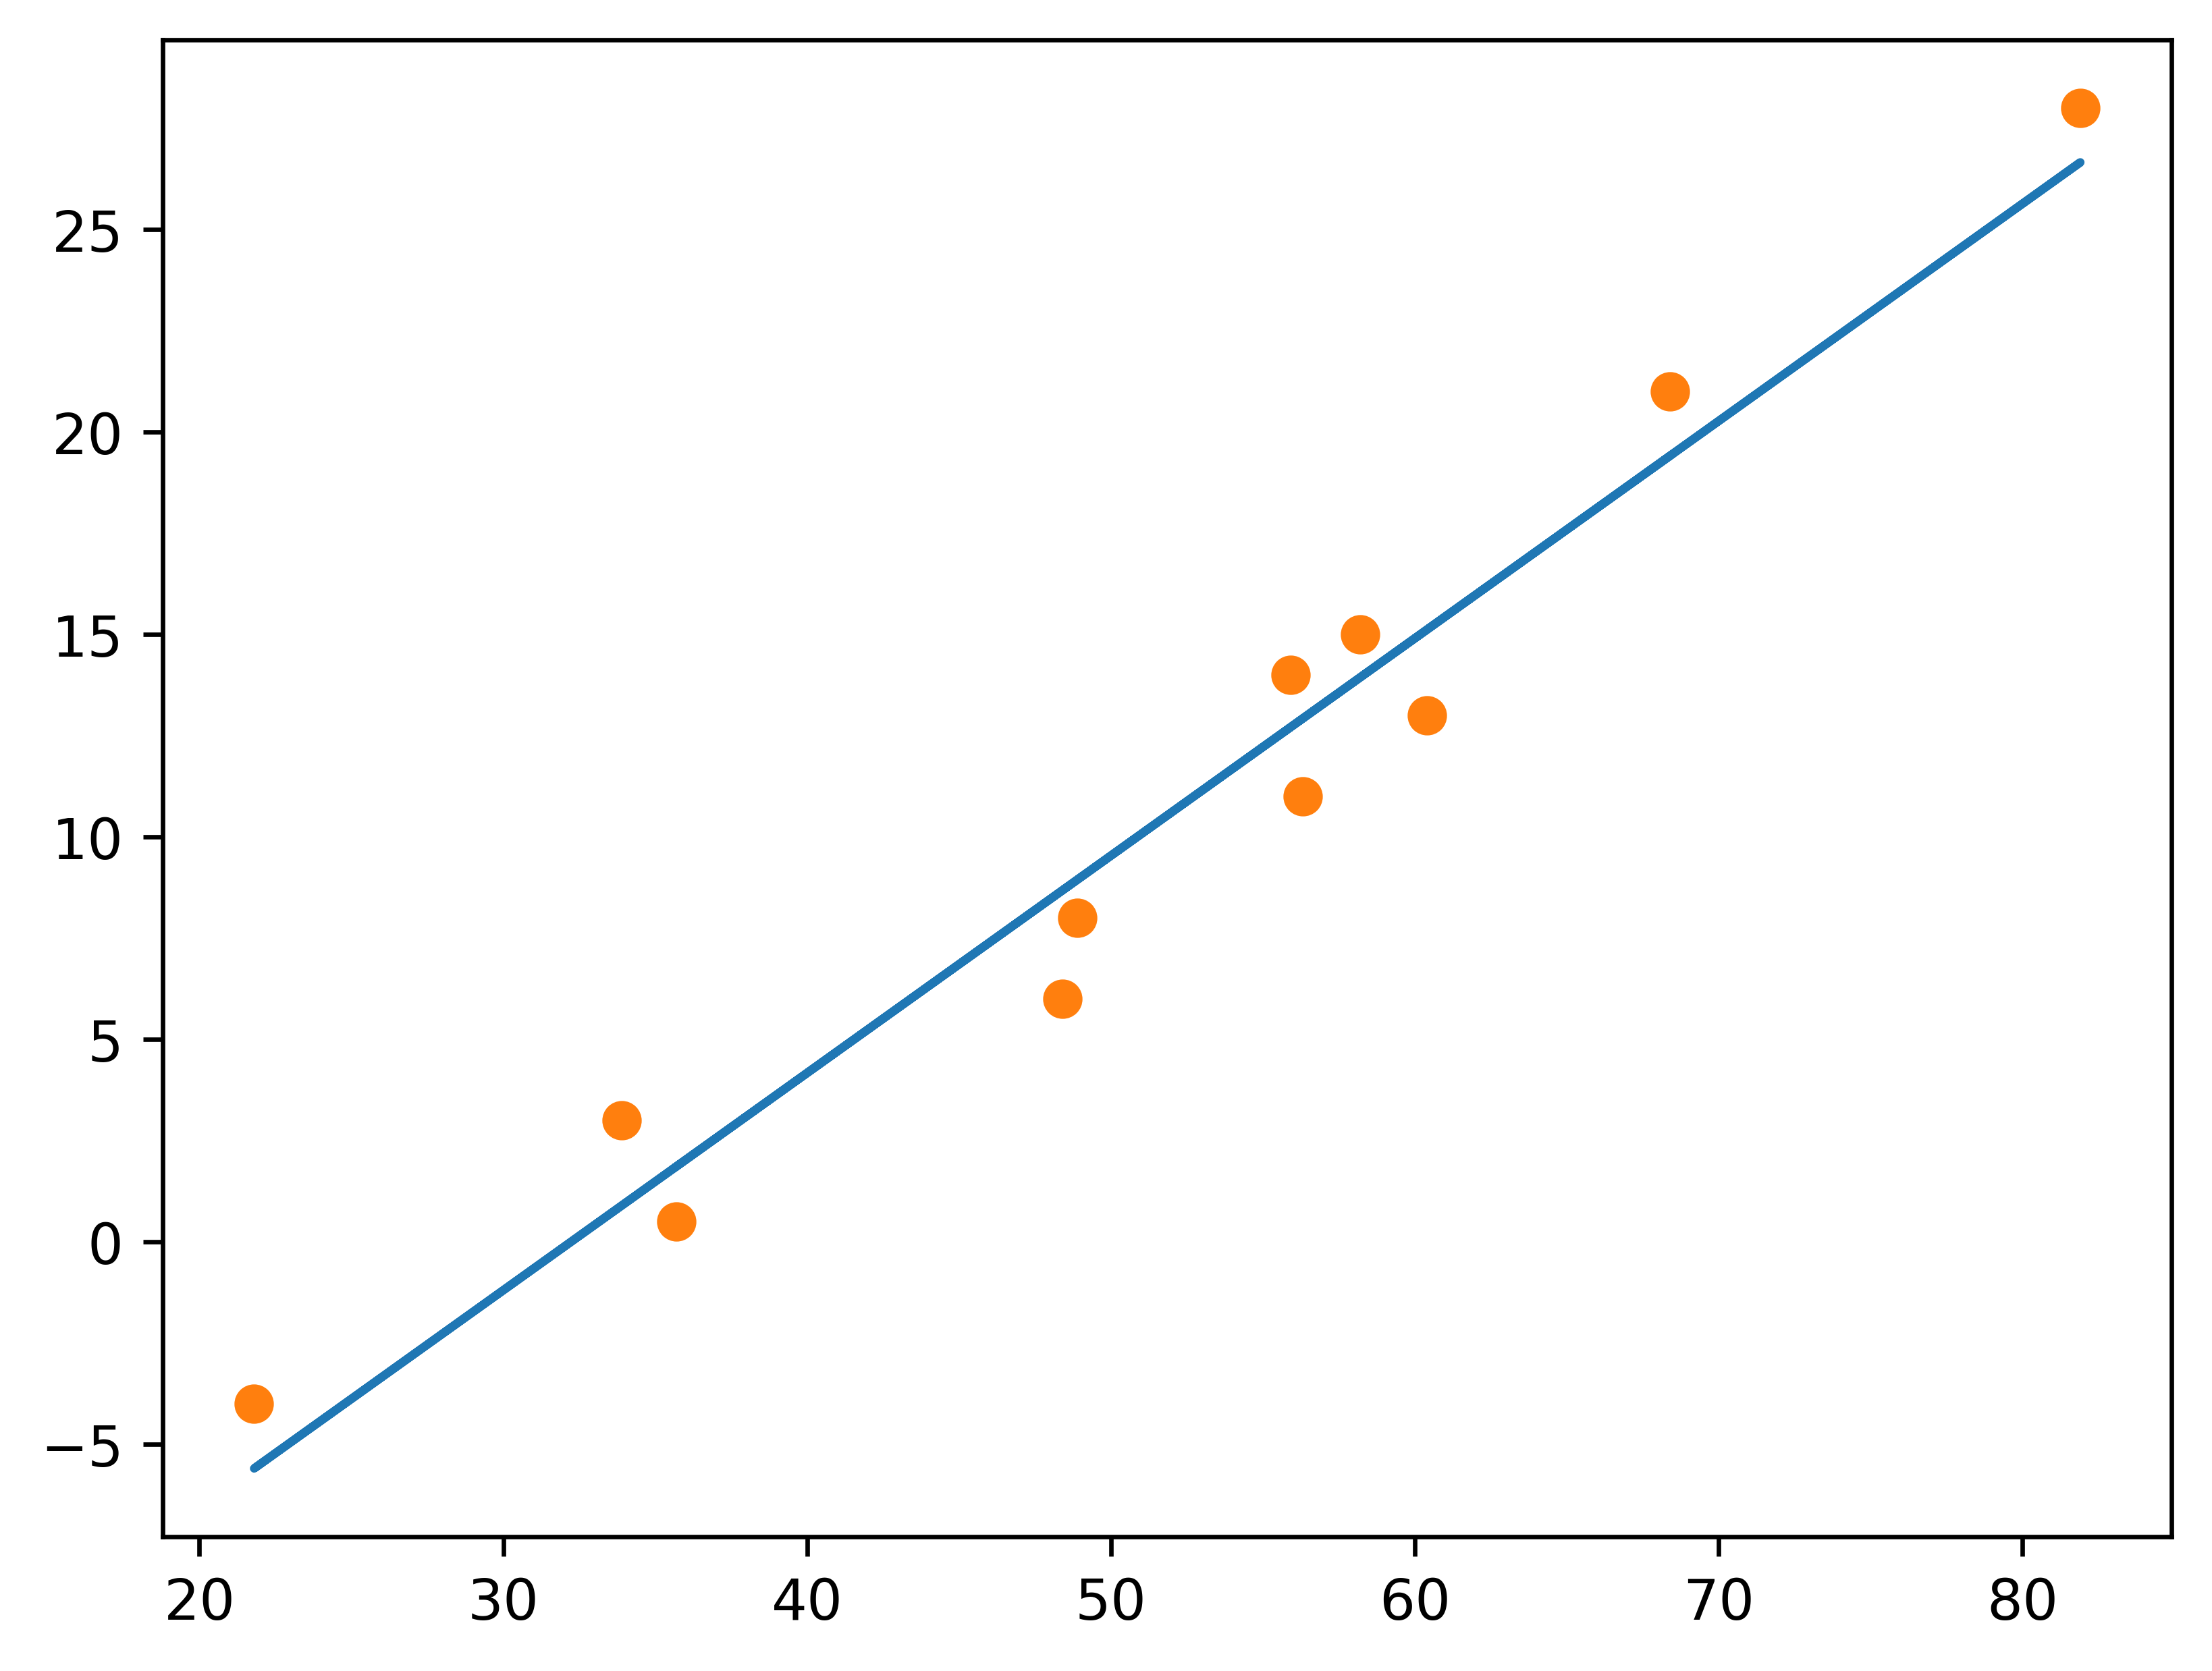

In [42]:
fig = plt.figure(dpi=600)
plt.xlabel("")
plt.ylabel("")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show()

In [43]:
import torch.optim as optim

In [44]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [45]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [46]:
t_p = model(t_u, *params)

In [47]:
loss = loss_fn(t_p, t_c)

In [48]:
loss.backward()

In [49]:
optimizer.step()

In [50]:
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [51]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [52]:
learning_rate=1e-2

In [53]:
optimizer = optim.SGD([params], lr=learning_rate)

In [54]:
t_p = model(t_un, *params)

In [55]:
loss = loss_fn(t_p, t_c)

In [56]:
optimizer.zero_grad()

In [57]:
loss.backward()

In [58]:
optimizer.step()

In [59]:
params

tensor([1.7761, 0.1064], requires_grad=True)

In [60]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print("Epoch %d, Loss %f" % (epoch, float(loss)))

    return params

In [61]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

In [62]:
training_loop(
    n_epochs = 5000,
    optimizer = optimizer, 
    params = params, 
    t_u = t_un,
    t_c = t_c
)

Epoch 500, Loss 7.860120
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [63]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

Adam -> Data의 Scale에 less-sensitive

In [64]:
training_loop(
    n_epochs=2000,
    optimizer=optimizer,
    params=params,
    t_u = t_u,
    t_c = t_c
)

Epoch 500, Loss 7.612900
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928579
Epoch 2000, Loss 2.927644


tensor([  0.5367, -17.3021], requires_grad=True)